## House price prediction using Linear Regression

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd

In [5]:
data = {
    'Size' : [1200, 1500, 1800, 1000, 2000, 1600, 1400, 1100, 1900, 1700],
    'Bedrooms' : [3, 3, 4, 2, 4, 3, 3, 2, 4, 3],
    'Bathrooms' : [2, 2, 3, 1, 3, 2, 2, 1, 3, 2],
    'Age' : [10, 5, 8, 15, 3, 6, 9, 12, 4, 7],
    'Distance_to_city' : [5, 10, 3, 20, 8, 12, 6, 18, 4, 15],
    'Price' : [250000, 300000, 350000, 200000, 400000, 320000, 280000, 230000, 380000, 340000]
}

In [6]:
df = pd.DataFrame(data)
df.head()

,Size,Bedrooms,Bathrooms,Age,Distance_to_city,Price
0,1200,3,2,10,5,250000
1,1500,3,2,5,10,300000
2,1800,4,3,8,3,350000
3,1000,2,1,15,20,200000
4,2000,4,3,3,8,400000


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X = df[['Size', 'Bedrooms', 'Bathrooms', 'Age', 'Distance_to_city']]
Y = df['Price']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [11]:
import numpy as np

In [12]:
Size = float(input("Enter the size of the house (in square feet): "))
Bedrooms = int(input("Enter the number of bedrooms: "))
Bathrooms = int(input("Enter the number of bathrooms: "))
Age = int(input("Enter the age of house (in years): "))
Distance_to_city = float(input("Enter the distance to the city (in kms): "))

Enter the size of the house (in square feet):  1200
Enter the number of bedrooms:  3
Enter the number of bathrooms:  5
Enter the age of house (in years):  7
Enter the distance to the city (in kms):  15


In [13]:
user_input = np.array([[Size, Bedrooms, Bathrooms, Age, Distance_to_city]])
predicted_price = model.predict(user_input)
print(f"The predicted price of the house is: ${predicted_price[0]: .2f}")

The predicted price of the house is: $ 276748.09


In [14]:
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
user_input_predicted_price = model.predict(X_test)
r2 = r2_score(Y_test, user_input_predicted_price)
print(f"R-Squared score:{r2:.2f}")

R-Squared score:0.95


In [16]:
rmse = np.sqrt(mean_squared_error(Y_test, user_input_predicted_price))
print(f"RMSE : {rmse:.2f}")

RMSE : 8604.37


In [17]:
import matplotlib.pyplot as plt

In [18]:
results = pd.DataFrame({'User input prediction': predicted_price[0],
                       'Actual Price': Y_test.values})
print(results)

   User input prediction  Actual Price
0          276748.093215        380000
1          276748.093215        300000


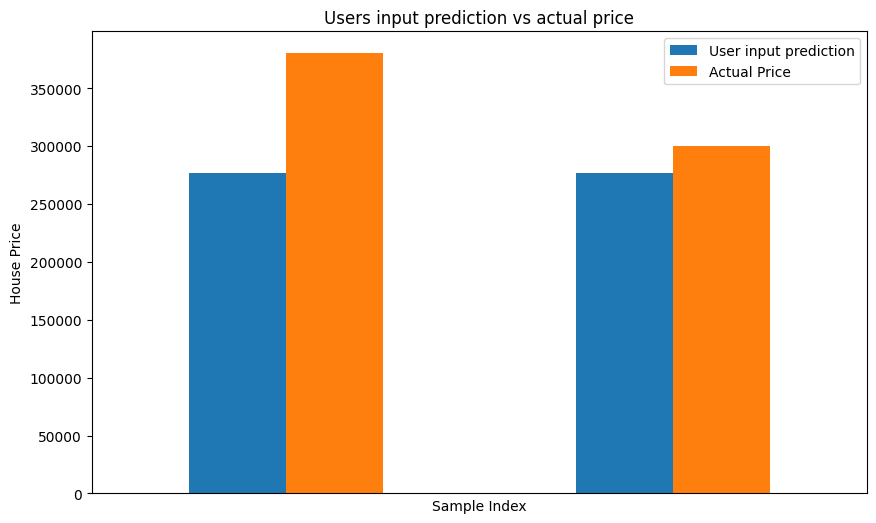

In [19]:
results.plot(kind = 'bar', figsize = (10,6))
plt.title("Users input prediction vs actual price")
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.xticks([])
plt.show()

## Car price prediction using Linear Regression

In [20]:
data_load = pd.read_csv("car_price_data.csv")

In [21]:
data_load.head()

,Mileage,Age,Previous_Owners,Brand,Condition,Price
0,15592,10,2,Ford,Fair,41545.0
1,4278,6,3,Ford,Excellent,21252.0
2,37048,10,3,Nissan,Good,60377.0
3,33098,4,2,Ford,Good,39164.0
4,30256,2,1,BMW,Good,40092.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
data_encoded = data_load.copy()

In [32]:
label_encoder = LabelEncoder()

In [33]:
data_encoded['Brand'] = label_encoder.fit_transform(data_encoded['Brand'])
data_encoded['Condition'] = label_encoder.fit_transform(data_encoded['Condition'])

In [34]:
X = data_encoded[['Mileage', 'Age', 'Previous_Owners', 'Brand', 'Condition']]
Y = data_encoded['Price']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [36]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [37]:
import numpy as np

In [38]:
Mileage = int(input("Enter Mileage Of Car: "))
Age = int(input("Enter Age Of Car: "))
Previous_Owners = int(input("Enter Previous Owners Number: "))
Brand = input("Enter Brand Of Car: ")
Condition = input("Enter Condition Of Car: ")

Enter Mileage Of Vechile:  32000
Enter Age Of Vechile:  3
Enter Previous Owners Number:  2
Enter Brand Of Vechile:  BMW
Enter Condition Of Vechile:  Excellent


In [39]:
brand_encoder = LabelEncoder()
condition_encoder = LabelEncoder()

In [40]:
brand_encoded = brand_encoder.fit_transform([Brand])
condition_encoded = condition_encoder.fit_transform([Condition])

In [41]:
Brand = brand_encoded[0]
Condition = condition_encoded[0]

In [42]:
user_input = np.array([[Mileage, Age, Previous_Owners, Brand, Condition]])
predicted_price = model.predict(user_input)
print(f"The predicted price of the vechile is: ${predicted_price[0]: .2f}")

The predicted price of the vechile is: $ 39762.23


In [43]:
from sklearn.metrics import r2_score, mean_squared_error

In [44]:
user_input_predicted_price = model.predict(X_test)
r2 = r2_score(Y_test, user_input_predicted_price)
print(f"R-Squared Score: {r2:.2f}")

R-Squared Score: 0.70


In [45]:
rmse = np.sqrt(mean_squared_error(Y_test, user_input_predicted_price))
print(f"RMSE : {rmse:.2f}")

RMSE : 7620.88


In [46]:
import matplotlib.pyplot as plt

In [47]:
results = pd.DataFrame({'User input prediction': predicted_price[0],
                       'Actual Price': Y_test.values})
print(results)

   User input prediction  Actual Price
0           39762.232092       39900.0
1           39762.232092       54028.0
2           39762.232092       52436.5
3           39762.232092       57636.5
4           39762.232092       75299.5
5           39762.232092       48764.5
6           39762.232092       32919.5
7           39762.232092       63298.0
8           39762.232092       33497.5
9           39762.232092       72191.5


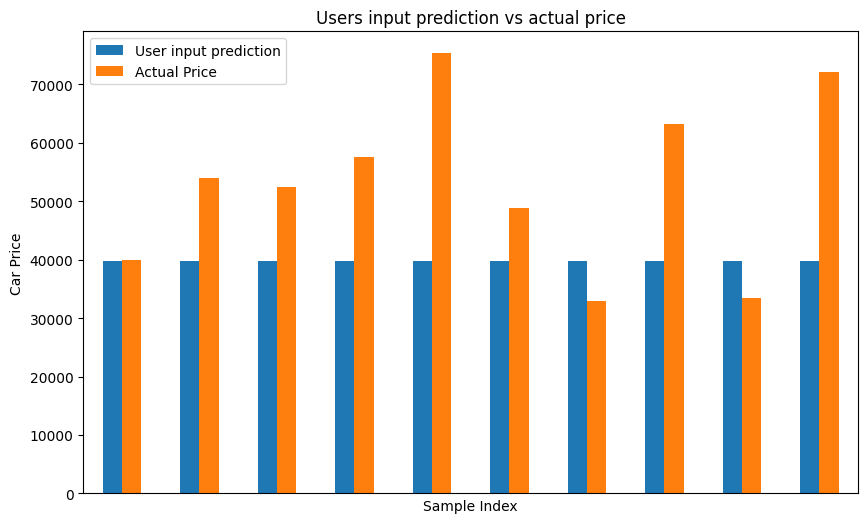

In [48]:
results.plot(kind = 'bar', figsize = (10,6))
plt.title("Users input prediction vs actual price")
plt.xlabel("Sample Index")
plt.ylabel("Car Price")
plt.xticks([])
plt.show()